In [1]:
import jax.numpy as np
import numpy as onp
import scipy as sp
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from dipole import VectorValuedKRR
from sklearn.metrics import mean_squared_error
import seaborn

In [2]:
data = np.load('data/HOOH.DFT.PBE-TS.light.MD.500K.50k.R_E_F_D_Q.npz')
X = np.array(data['R'])
y = np.array(data['D'])
M = X.shape[0]

In [3]:
model = VectorValuedKRR(lamb=1.313, sigma=3833.3)
model.y = y[:100]
try:
    model.load(100)
except Exception:
    model.fit(X[:100], y[:100])

In [4]:
test_indices = onp.random.choice(M, size=500, replace=False)
Xtest, ytest = X[test_indices], y[test_indices]

In [5]:
yhat = model.predict(Xtest)
d = yhat - ytest
d.shape

(500, 3)

In [6]:
x, y, z = np.hsplit(d, 3)
x, y, z = (np.squeeze(each) for each in [x, y, z])
x.shape

(500,)

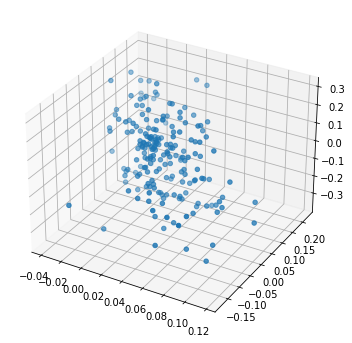

In [7]:
# %matplotlib notebook
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter(x[:200], y[:200], z[:200])
plt.show()

In [8]:
d_red = np.mean(d, axis=1)
d_red.shape

(500,)

In [9]:
%matplotlib inline
def hist(data, color=None):
    _, bins, _ = plt.hist(data, 20, density=1, alpha=0.5)
    mu, sigma = sp.stats.norm.fit(data)
    best_fit_line = sp.stats.norm.pdf(bins, mu, sigma)
    plt.plot(bins, best_fit_line, color=color)
    plt.xlim(-0.5, 0.3)
    plt.ylim(0, 18)
    # plt.show()

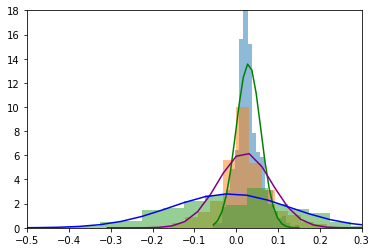

In [10]:
hist(x, color='green')
hist(y, color='purple')
hist(z, color='blue')

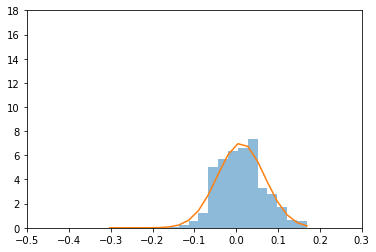

In [11]:
hist(d_red)